Some Kind of description here

## Import Statements

In [115]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from pathlib import Path

## Data Exploration

In [116]:
file_path = Path('.') / 'data_files' / 'abortion.csv'
df = pd.read_csv(file_path)

In [117]:
df.head()

,tweet,date,likes,retweets,sentiment
0,“This new law serves to empower women with kno...,"Jan 1, 2021",264,65,positive
1,Was about to comment on this but...#AbortoLega...,"Jan 1, 2021",4,1,positive
2,You are human regardless of how people feel ab...,"Jan 1, 2021",5,3,positive
3,#Hello2021 Hello out there. In a quest to addr...,"Jan 1, 2021",2,3,negative
4,Happy New Year 2021! Lets liberate abortion pi...,"Jan 1, 2021",13,3,positive


In [118]:
df.tail()

,tweet,date,likes,retweets,sentiment
39760,Republicans Are Lying About #Abortion Because ...,"May 21, 2022",0,0,negative
39761,Devil Woman Pelosi has finally been banned by ...,"May 20, 2022",5,2,negative
39762,"""If Roe is overturned, abortion advocates are ...","May 20, 2022",0,0,negative
39763,Precaution/Prevention/Contraception IS a woman...,"May 20, 2022",0,1,negative
39764,"In this art short video, I look at the abortio...","May 21, 2022",0,0,negative


In [119]:
df.shape

(39765, 5)

In [120]:
df.count()

tweet        39765
date         39765
likes        39765
retweets     39765
sentiment    39765
dtype: int64

In [121]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True)
df.groupby('date').count()

,tweet,likes,retweets,sentiment
date,,,,
2021-01-01,83,83,83,83
2021-01-02,71,71,71,71
2021-01-03,73,73,73,73
2021-01-04,77,77,77,77
2021-01-05,93,93,93,93
...,...,...,...,...
2022-05-17,255,255,255,255
2022-05-18,343,343,343,343
2022-05-19,369,369,369,369


In [122]:
# Get number of positive tweets for each date
pos = df[df['sentiment'] == 'positive']
pos['date']
pos_tweets = pos.groupby(['date', 'sentiment'], as_index=False).size() # as_index creates relevant columns in a DF
pos_tweets.rename({'size': 'positive_tweets'}, inplace=True, axis='columns')
pos_tweets.drop({'sentiment'}, axis='columns')
pos_likes_retweets = pos.groupby(['date'], as_index=False).sum()

pos_final = pos_likes_retweets.copy()
pos_final['positive_tweets'] = pos_tweets['positive_tweets']
pos_final

,date,likes,retweets,positive_tweets
0,2021-01-01,438,111,40
1,2021-01-02,24,19,24
2,2021-01-03,156,76,23
3,2021-01-04,234,116,41
4,2021-01-05,245,85,42
...,...,...,...,...
501,2022-05-17,1637,459,90
502,2022-05-18,724,299,136
503,2022-05-19,573,262,144
504,2022-05-20,923,268,108


In [123]:
# Get number of negative tweets for each date
neg = df[df['sentiment'] == 'negative']
neg['date']
neg_tweets = neg.groupby(['date', 'sentiment'], as_index=False).size() # as_index creates relevant columns in a DF
neg_tweets.rename({'size': 'negative_tweets'}, inplace=True, axis='columns')
neg_tweets.drop({'sentiment'}, axis='columns')
neg_likes_retweets = neg.groupby(['date'], as_index=False).sum()

neg_final = neg_likes_retweets.copy()
neg_final['negative_tweets'] = neg_tweets['negative_tweets']
neg_final

,date,likes,retweets,negative_tweets
0,2021-01-01,50,27,43
1,2021-01-02,32,11,47
2,2021-01-03,142,62,50
3,2021-01-04,105,72,36
4,2021-01-05,176,48,51
...,...,...,...,...
501,2022-05-17,823,359,165
502,2022-05-18,948,341,207
503,2022-05-19,3041,1114,225
504,2022-05-20,1386,505,178


In [124]:
# Create new DataFrame with date, positive_tweets, and negative_tweets
final_df = pos_final[['date', 'positive_tweets']]
final_df['positive_retweets'] = pos_final['retweets']
final_df['positive_likes'] = pos_final['likes']

final_df['negative_tweets'] = neg_final['negative_tweets']
final_df['negative_likes'] = neg_final['likes']
final_df['negative_retweets'] = neg_final['retweets']

final_df['total_tweets'] = new_df['positive_tweets'] + new_df['negative_tweets']
final_df

C:\Users\Nick\AppData\Local\Temp/ipykernel_10668/2778370643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['positive_retweets'] = pos_final['retweets']


,date,positive_tweets,positive_retweets,positive_likes,negative_tweets,negative_likes,negative_retweets,total_tweets
0,2021-01-01,40,111,438,43,50,27,83
1,2021-01-02,24,19,24,47,32,11,71
2,2021-01-03,23,76,156,50,142,62,73
3,2021-01-04,41,116,234,36,105,72,77
4,2021-01-05,42,85,245,51,176,48,93
...,...,...,...,...,...,...,...,...
501,2022-05-17,90,459,1637,165,823,359,255
502,2022-05-18,136,299,724,207,948,341,343
503,2022-05-19,144,262,573,225,3041,1114,369
504,2022-05-20,108,268,923,178,1386,505,286


In [125]:
# Determine unweighted percentages for pos/neg tweets on each date
percentage_df = final_df.copy()
percentage_df['positive_tweets'] = round(percentage_df['positive_tweets'] / percentage_df['total_tweets'], 2)
percentage_df.rename({'positive_tweets': 'pos_percentage'}, axis='columns', inplace=True)
percentage_df['negative_tweets'] = round(percentage_df['negative_tweets'] / percentage_df['total_tweets'], 2)
percentage_df.rename({'negative_tweets': 'neg_percentage'}, axis='columns', inplace=True)
percentage_df

,date,pos_percentage,positive_retweets,positive_likes,neg_percentage,negative_likes,negative_retweets,total_tweets
0,2021-01-01,0.48,111,438,0.52,50,27,83
1,2021-01-02,0.34,19,24,0.66,32,11,71
2,2021-01-03,0.32,76,156,0.68,142,62,73
3,2021-01-04,0.53,116,234,0.47,105,72,77
4,2021-01-05,0.45,85,245,0.55,176,48,93
...,...,...,...,...,...,...,...,...
501,2022-05-17,0.35,459,1637,0.65,823,359,255
502,2022-05-18,0.40,299,724,0.60,948,341,343
503,2022-05-19,0.39,262,573,0.61,3041,1114,369
504,2022-05-20,0.38,268,923,0.62,1386,505,286


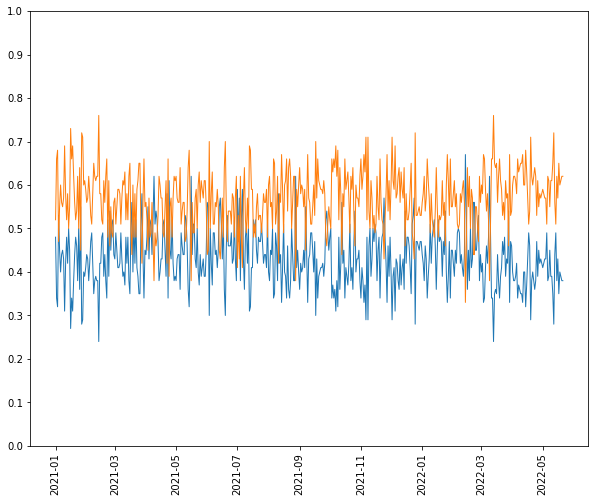

In [126]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.yticks(numpy.arange(0, 1.1, 0.1))
plt.plot(percentage_df['date'], percentage_df['pos_percentage'], linewidth=1)
plt.plot(percentage_df['date'], percentage_df['neg_percentage'], linewidth=1)

In [127]:
# Get day, month, year data from 'date'
percentage_df['day'] = pd.DatetimeIndex(percentage_df['date']).day
percentage_df['month'] = percentage_df['date'].dt.month_name()
percentage_df['year'] = pd.DatetimeIndex(percentage_df['date']).year
percentage_df.reindex(columns=['date', 'month', 'day', 'year', 'pos_percentage', 'neg_percentage', 'total_tweets'])

,date,month,day,year,pos_percentage,neg_percentage,total_tweets
0,2021-01-01,January,1,2021,0.48,0.52,83
1,2021-01-02,January,2,2021,0.34,0.66,71
2,2021-01-03,January,3,2021,0.32,0.68,73
3,2021-01-04,January,4,2021,0.53,0.47,77
4,2021-01-05,January,5,2021,0.45,0.55,93
...,...,...,...,...,...,...,...
501,2022-05-17,May,17,2022,0.35,0.65,255
502,2022-05-18,May,18,2022,0.40,0.60,343
503,2022-05-19,May,19,2022,0.39,0.61,369
504,2022-05-20,May,20,2022,0.38,0.62,286


In [128]:
# Zoom in an a particular month
percentage_df_april2022 = percentage_df.loc[(percentage_df['month'] == 'April') & (percentage_df['year'] == 2022)]
percentage_df_april2022

,date,pos_percentage,positive_retweets,positive_likes,neg_percentage,negative_likes,negative_retweets,total_tweets,day,month,year
455,2022-04-01,0.40,60,147,0.60,465,133,91,1,April,2022
456,2022-04-02,0.38,41,99,0.62,197,63,64,2,April,2022
457,2022-04-03,0.38,60,294,0.62,279,95,65,3,April,2022
458,2022-04-04,0.39,77,186,0.61,1110,337,88,4,April,2022
459,2022-04-05,0.42,248,572,0.58,1208,385,99,5,April,2022
460,2022-04-06,0.34,155,359,0.66,759,299,100,6,April,2022
461,2022-04-07,0.37,239,914,0.63,322,162,83,7,April,2022
462,2022-04-08,0.36,145,384,0.64,389,173,95,8,April,2022
463,2022-04-09,0.35,350,914,0.65,1094,362,92,9,April,2022
464,2022-04-10,0.35,52,197,0.65,1499,542,82,10,April,2022


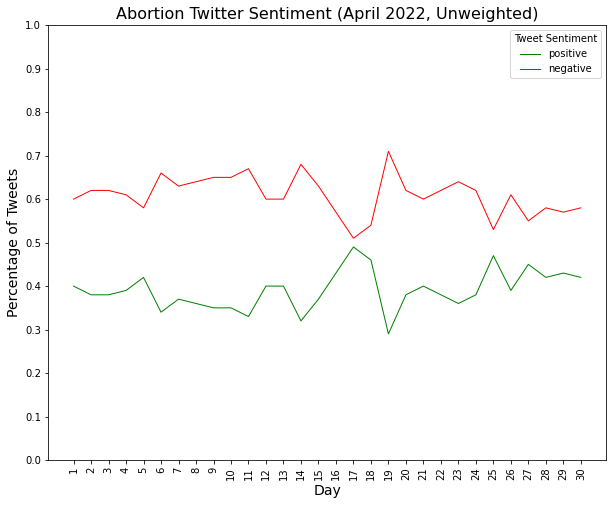

In [129]:
# Plot month's data
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.yticks(numpy.arange(0, 1.1, 0.1))
plt.xticks(range(1, percentage_df_april2022['day'].iloc[-1] + 1, 1))
plt.xlabel('Day', size=14)
plt.ylabel('Percentage of Tweets', size=14)
plt.title(f'Abortion Twitter Sentiment (April 2022, Unweighted)', size=16)
plt.plot(percentage_df_april2022['day'], percentage_df_april2022['pos_percentage'], linewidth=1, label='positive', color='green')
plt.plot(percentage_df_april2022['day'], percentage_df_april2022['neg_percentage'], linewidth=1, label='negative', color='red')
plt.legend(title='Tweet Sentiment')

In [130]:
# Now, let's zoom out to consider a whole year at once
df_2021 = final_df.copy()
df_2021['day'] = pd.DatetimeIndex(df_2021['date']).day
df_2021['month'] = df_2021['date'].dt.month_name()
df_2021['year'] = pd.DatetimeIndex(df_2021['date']).year
df_2021 = df_2021.loc[(df_2021['year'] == 2021)]
df_2021.reindex(columns=['date', 'month', 'day', 'year', 'positive_tweets', 'negative_tweets', 'total_tweets'])
df_2021 = df_2021.groupby(['month'], as_index=False).sum()
df_2021

,month,positive_tweets,positive_retweets,positive_likes,negative_tweets,negative_likes,negative_retweets,total_tweets,day,year
0,April,873,1200,4061,990,5624,2139,1863,465,60630
1,August,789,1631,4992,1071,4488,2436,1860,496,62651
2,December,1036,4055,16074,1419,32270,9925,2455,496,62651
3,February,868,2131,5756,1159,6029,2790,2027,406,56588
4,January,1003,3342,9372,1445,16926,7138,2448,496,62651
5,July,941,1707,4683,1110,6549,2466,2051,496,62651
6,June,968,1918,5129,1144,5683,2180,2112,465,60630
7,March,972,1929,5710,1265,6122,2419,2237,496,62651
8,May,967,2690,9201,1253,12386,5311,2220,496,62651
9,November,947,1894,4972,1279,8265,3488,2226,465,60630


In [131]:
# Sort by month for easier reading and drop unnecessary columns
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_2021['month'] = pd.Categorical(df_2021['month'], categories=months_order, ordered=True)
df_2021.sort_values(by='month', inplace=True)
df_2021.drop({'day', 'year'}, axis='columns', inplace=True)
df_2021

,month,positive_tweets,positive_retweets,positive_likes,negative_tweets,negative_likes,negative_retweets,total_tweets
4,January,1003,3342,9372,1445,16926,7138,2448
3,February,868,2131,5756,1159,6029,2790,2027
7,March,972,1929,5710,1265,6122,2419,2237
0,April,873,1200,4061,990,5624,2139,1863
8,May,967,2690,9201,1253,12386,5311,2220
6,June,968,1918,5129,1144,5683,2180,2112
5,July,941,1707,4683,1110,6549,2466,2051
1,August,789,1631,4992,1071,4488,2436,1860
11,September,1120,8259,24231,1495,32968,11394,2615
10,October,1066,3385,11332,1501,23875,8634,2567


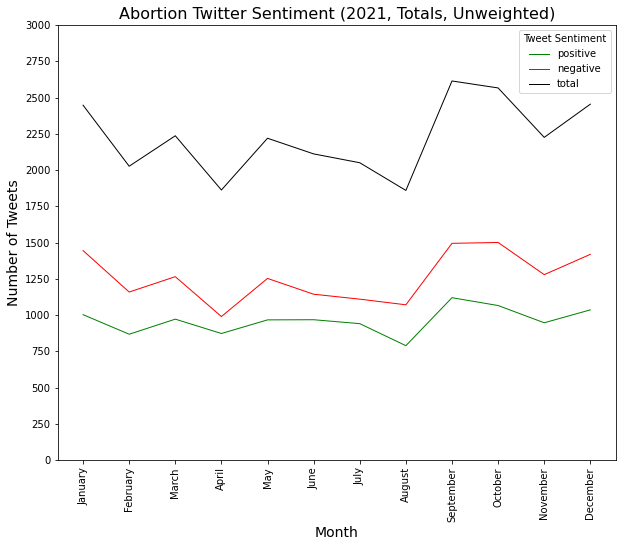

In [132]:
# Plot year's data (in terms of total tweets)
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.ylim(0, 3000)
plt.yticks(range(0, 3250, 250))
plt.xticks(range(0, 12, 1))
plt.xlabel('Month', size=14)
plt.ylabel('Number of Tweets', size=14)
plt.title('Abortion Twitter Sentiment (2021, Totals, Unweighted)', size=16)
plt.plot(df_2021['month'], df_2021['positive_tweets'], linewidth=1, label='positive', color='green')
plt.plot(df_2021['month'], df_2021['negative_tweets'], linewidth=1, label='negative', color='red')

plt.plot(df_2021['month'], df_2021['total_tweets'], linewidth=1, label='total', color='black')

plt.legend(title='Tweet Sentiment')

In [133]:
# Get percentages as before
df_2021_percentages = df_2021.copy()
df_2021_percentages['positive_tweets'] = round(df_2021_percentages['positive_tweets'] / df_2021_percentages['total_tweets'], 2)
df_2021_percentages.rename({'positive_tweets': 'pos_percentage'}, axis='columns', inplace=True)
df_2021_percentages['negative_tweets'] = round(df_2021_percentages['negative_tweets'] / df_2021_percentages['total_tweets'], 2)
df_2021_percentages.rename({'negative_tweets': 'neg_percentage'}, axis='columns', inplace=True)
df_2021_percentages

,month,pos_percentage,positive_retweets,positive_likes,neg_percentage,negative_likes,negative_retweets,total_tweets
4,January,0.41,3342,9372,0.59,16926,7138,2448
3,February,0.43,2131,5756,0.57,6029,2790,2027
7,March,0.43,1929,5710,0.57,6122,2419,2237
0,April,0.47,1200,4061,0.53,5624,2139,1863
8,May,0.44,2690,9201,0.56,12386,5311,2220
6,June,0.46,1918,5129,0.54,5683,2180,2112
5,July,0.46,1707,4683,0.54,6549,2466,2051
1,August,0.42,1631,4992,0.58,4488,2436,1860
11,September,0.43,8259,24231,0.57,32968,11394,2615
10,October,0.42,3385,11332,0.58,23875,8634,2567


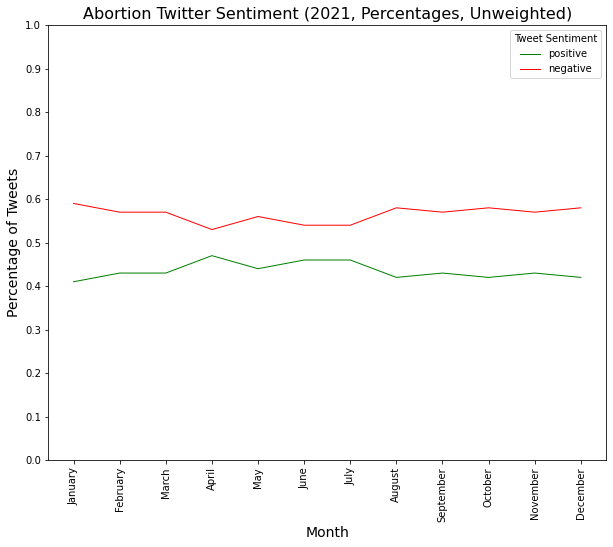

In [134]:
# Plot year's data (in terms of percentages)
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.yticks(numpy.arange(0, 1.1, 0.1))
plt.xticks(range(0, 12, 1))
plt.xlabel('Month', size=14)
plt.ylabel('Percentage of Tweets', size=14)
plt.title('Abortion Twitter Sentiment (2021, Percentages, Unweighted)', size=16)
plt.plot(df_2021_percentages['month'], df_2021_percentages['pos_percentage'], linewidth=1, label='positive', color='green')
plt.plot(df_2021_percentages['month'], df_2021_percentages['neg_percentage'], linewidth=1, label='negative', color='red')

# axis2 = plt.gca().twinx()
# axis2.plot(df_2021_percentages['month'], df_2021_percentages['total_tweets'], linewidth=1, label='total')

plt.legend(title='Tweet Sentiment')

In [135]:
# TODO: Consider likes and retweets for weighted sentiment analysis
weighted_df = pd.DataFrame().assign(date = final_df['date'])
weighted_df['positive_score'] = final_df['positive_tweets'] + final_df['positive_retweets'] + final_df['positive_likes']
weighted_df['negative_score'] = final_df['negative_tweets'] + final_df['negative_retweets'] + final_df['negative_likes']
weighted_df['total_score'] = weighted_df['positive_score'] + weighted_df['negative_score']
weighted_df

,date,positive_score,negative_score,total_score
0,2021-01-01,589,120,709
1,2021-01-02,67,90,157
2,2021-01-03,255,254,509
3,2021-01-04,391,213,604
4,2021-01-05,372,275,647
...,...,...,...,...
501,2022-05-17,2186,1347,3533
502,2022-05-18,1159,1496,2655
503,2022-05-19,979,4380,5359
504,2022-05-20,1299,2069,3368


In [136]:
# Determine weighted percentages for pos/neg tweets on each date
weighted_percentage_df = weighted_df.copy()
weighted_percentage_df['positive_score'] = round(weighted_percentage_df['positive_score'] 
                                                  / weighted_percentage_df['total_score'], 2)
weighted_percentage_df.rename({'positive_score': 'pos_score_percentage'}, axis='columns', inplace=True)
weighted_percentage_df['negative_score'] = round(weighted_percentage_df['negative_score'] 
                                                  / weighted_percentage_df['total_score'], 2)
weighted_percentage_df.rename({'negative_score': 'neg_score_percentage'}, axis='columns', inplace=True)
weighted_percentage_df

,date,pos_score_percentage,neg_score_percentage,total_score
0,2021-01-01,0.83,0.17,709
1,2021-01-02,0.43,0.57,157
2,2021-01-03,0.50,0.50,509
3,2021-01-04,0.65,0.35,604
4,2021-01-05,0.57,0.43,647
...,...,...,...,...
501,2022-05-17,0.62,0.38,3533
502,2022-05-18,0.44,0.56,2655
503,2022-05-19,0.18,0.82,5359
504,2022-05-20,0.39,0.61,3368


In [140]:
# Get day, month, year data from 'date'
weighted_percentage_df['day'] = pd.DatetimeIndex(weighted_percentage_df['date']).day
weighted_percentage_df['month'] = weighted_percentage_df['date'].dt.month_name()
weighted_percentage_df['year'] = pd.DatetimeIndex(weighted_percentage_df['date']).year
weighted_percentage_df.reindex(columns=['date', 'month', 'day', 'year', 
                                        'pos_score_percentage', 'neg_score_percentage', 'total_score'])

,date,month,day,year,pos_score_percentage,neg_score_percentage,total_score
0,2021-01-01,January,1,2021,0.83,0.17,709
1,2021-01-02,January,2,2021,0.43,0.57,157
2,2021-01-03,January,3,2021,0.50,0.50,509
3,2021-01-04,January,4,2021,0.65,0.35,604
4,2021-01-05,January,5,2021,0.57,0.43,647
...,...,...,...,...,...,...,...
501,2022-05-17,May,17,2022,0.62,0.38,3533
502,2022-05-18,May,18,2022,0.44,0.56,2655
503,2022-05-19,May,19,2022,0.18,0.82,5359
504,2022-05-20,May,20,2022,0.39,0.61,3368


In [142]:
# Zoom in an a particular month
weighted_percentage_df_april2022 = weighted_percentage_df.loc[(weighted_percentage_df['month'] == 'April') 
                                                              & (weighted_percentage_df['year'] == 2022)]
weighted_percentage_df_april2022

,date,pos_score_percentage,neg_score_percentage,total_score,day,month,year
455,2022-04-01,0.27,0.73,896,1,April,2022
456,2022-04-02,0.35,0.65,464,2,April,2022
457,2022-04-03,0.48,0.52,793,3,April,2022
458,2022-04-04,0.17,0.83,1798,4,April,2022
459,2022-04-05,0.34,0.66,2512,5,April,2022
460,2022-04-06,0.33,0.67,1672,6,April,2022
461,2022-04-07,0.69,0.31,1720,7,April,2022
462,2022-04-08,0.47,0.53,1186,8,April,2022
463,2022-04-09,0.46,0.54,2812,9,April,2022
464,2022-04-10,0.12,0.88,2372,10,April,2022


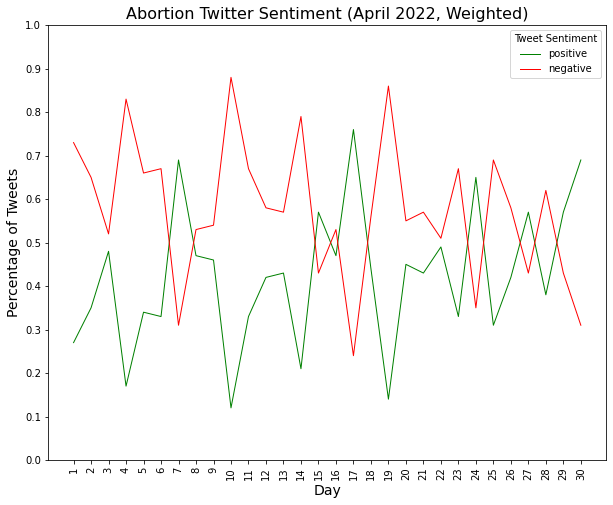

In [144]:
# Plot month's weighted data
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.yticks(numpy.arange(0, 1.1, 0.1))
plt.xticks(range(1, weighted_percentage_df_april2022['day'].iloc[-1] + 1, 1))
plt.xlabel('Day', size=14)
plt.ylabel('Percentage of Tweets', size=14)
plt.title(f'Abortion Twitter Sentiment (April 2022, Weighted)', size=16)
plt.plot(weighted_percentage_df_april2022['day'], weighted_percentage_df_april2022['pos_score_percentage'], 
         linewidth=1, label='positive', color='green')
plt.plot(weighted_percentage_df_april2022['day'], weighted_percentage_df_april2022['neg_score_percentage'], 
         linewidth=1, label='negative', color='red')
plt.legend(title='Tweet Sentiment')

In [166]:
# Now, let's zoom out to consider a whole year at once (weighted)
df_2021_weighted = final_df.copy()
df_2021_weighted['day'] = pd.DatetimeIndex(df_2021_weighted['date']).day
df_2021_weighted['month'] = df_2021_weighted['date'].dt.month_name()
df_2021_weighted['year'] = pd.DatetimeIndex(df_2021_weighted['date']).year
df_2021_weighted = df_2021_weighted.loc[(df_2021_weighted['year'] == 2021)]
df_2021_weighted.reindex(columns=['date', 'month', 'day', 'year', 'positive_tweets', 'negative_tweets', 'total_tweets'])
df_2021_weighted = df_2021_weighted.groupby(['month'], as_index=False).sum()
df_2021_weighted

,month,positive_tweets,positive_retweets,positive_likes,negative_tweets,negative_likes,negative_retweets,total_tweets,day,year
0,April,873,1200,4061,990,5624,2139,1863,465,60630
1,August,789,1631,4992,1071,4488,2436,1860,496,62651
2,December,1036,4055,16074,1419,32270,9925,2455,496,62651
3,February,868,2131,5756,1159,6029,2790,2027,406,56588
4,January,1003,3342,9372,1445,16926,7138,2448,496,62651
5,July,941,1707,4683,1110,6549,2466,2051,496,62651
6,June,968,1918,5129,1144,5683,2180,2112,465,60630
7,March,972,1929,5710,1265,6122,2419,2237,496,62651
8,May,967,2690,9201,1253,12386,5311,2220,496,62651
9,November,947,1894,4972,1279,8265,3488,2226,465,60630


In [167]:
# Sort by month for easier reading and drop unnecessary columns
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_2021_weighted['month'] = pd.Categorical(df_2021['month'], categories=months_order, ordered=True)
df_2021_weighted.sort_values(by='month', inplace=True)
df_2021_weighted['positive_score'] = df_2021_weighted['positive_tweets'] + df_2021_weighted['positive_retweets'] + df_2021_weighted['positive_likes']
df_2021_weighted['negative_score'] = df_2021_weighted['negative_tweets'] + df_2021_weighted['negative_retweets'] + df_2021_weighted['negative_likes']
df_2021_weighted['total_score'] = df_2021_weighted['positive_score'] + df_2021_weighted['negative_score']

df_2021_weighted.drop({'positive_tweets', 'positive_likes', 'positive_retweets', 'negative_tweets', 
                       'negative_likes', 'negative_retweets', 'day', 'year', 'total_tweets'}, axis='columns', inplace=True)
df_2021_weighted

,month,positive_score,negative_score,total_score
0,January,6134,8753,14887
1,February,7412,7995,15407
2,March,21165,43614,64779
3,April,8755,9978,18733
4,May,13717,25509,39226
5,June,7331,10125,17456
6,July,8015,9007,17022
7,August,8611,9806,18417
8,September,12858,18950,31808
9,October,7813,13032,20845


In [170]:
# Get percentages as before
df_2021_percentages_weighted = df_2021_weighted.copy()
df_2021_percentages_weighted['pos_percentage'] = round(df_2021_percentages_weighted['positive_score'] / df_2021_percentages_weighted['total_score'], 2)
df_2021_percentages_weighted['neg_percentage'] = round(df_2021_percentages_weighted['negative_score'] / df_2021_percentages_weighted['total_score'], 2)
df_2021_percentages_weighted.drop({'positive_score', 'negative_score'}, axis='columns', inplace=True)
df_2021_percentages_weighted

,month,total_score,pos_percentage,neg_percentage
0,January,14887,0.41,0.59
1,February,15407,0.48,0.52
2,March,64779,0.33,0.67
3,April,18733,0.47,0.53
4,May,39226,0.35,0.65
5,June,17456,0.42,0.58
6,July,17022,0.47,0.53
7,August,18417,0.47,0.53
8,September,31808,0.40,0.60
9,October,20845,0.37,0.63


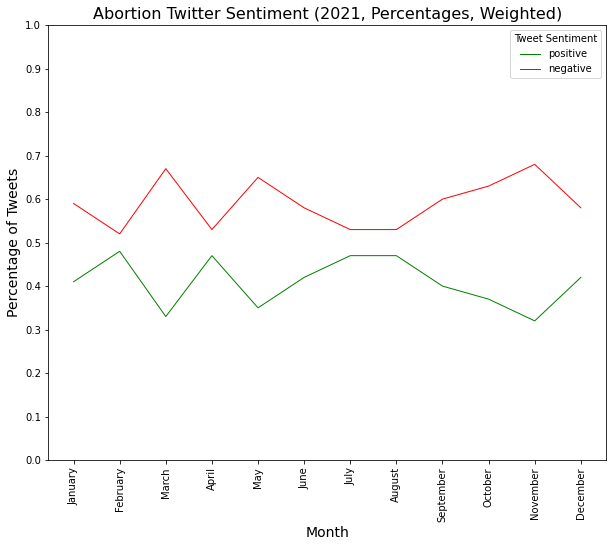

In [171]:
# Plot year's data (in terms of weighted percentages)
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.yticks(numpy.arange(0, 1.1, 0.1))
plt.xticks(range(0, 12, 1))
plt.xlabel('Month', size=14)
plt.ylabel('Percentage of Tweets', size=14)
plt.title('Abortion Twitter Sentiment (2021, Percentages, Weighted)', size=16)
plt.plot(df_2021_percentages_weighted['month'], df_2021_percentages_weighted['pos_percentage'], linewidth=1, label='positive', color='green')
plt.plot(df_2021_percentages_weighted['month'], df_2021_percentages_weighted['neg_percentage'], linewidth=1, label='negative', color='red')

# axis2 = plt.gca().twinx()
# axis2.plot(df_2021_percentages['month'], df_2021_percentages['total_tweets'], linewidth=1, label='total')

plt.legend(title='Tweet Sentiment')